<a href="https://colab.research.google.com/github/HPCL/roofline_python/blob/main/roofline_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import io
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import plotly.graph_objects as go

## google colab users: you can run the next code cell (and comment out the jupyter code cell that is after)
## jupyter notebook users do the opposite

### change the file name to upload the json file that you want.


In [24]:
# GOOGLE COLAB
# Load the json file
#from google.colab import files
#uploaded = files.upload()

# Load 
#filename = "roofline.json"
#data = json.loads(uploaded[filename].decode("utf-8"))
#data

In [25]:
# JUPYTER NOTEBOOK
#filename = "roofline_a64_DP.json"
filename = "roofline.json"
with open(filename) as file:
    data = json.load(file)
data

{'empirical': {'metadata': {},
  'gflops': {'data': [['FP64 GFLOPs', 2772.78]],
   'metadata': {'': ['META_DATA',
     'FLOPS          64',
     'OPENMP_THREADS 80',
     'ERT_VERSION  1.1.0',
     "HOSTNAME  ('apollo.cs.uoregon.edu', [], ['128.223.8.36'])",
     "UNAME  uname_result(system='Linux', node='apollo', release='5.3.0-70-generic', version='#66-Ubuntu SMP Fri Jan 29 21:31:57 UTC 2021', machine='x86_64', processor='x86_64')",
     'TIMESTAMP_DATA  1619038298.9375675',
     "CONFIG  {'ERT_RESULTS': ['Results.apollo.skylake_gold'], 'ERT_DRIVER': ['driver1'], 'ERT_KERNEL': ['kernel1'], 'ERT_MPI': ['False'], 'ERT_MPI_CFLAGS': [], 'ERT_MPI_LDFLAGS': [], 'ERT_OPENMP': ['True'], 'ERT_OPENMP_CFLAGS': ['-fopenmp'], 'ERT_OPENMP_LDFLAGS': ['-fopenmp'], 'ERT_FLOPS': ['1,2,4,8,16,32,64,128'], 'ERT_ALIGN': ['32'], 'ERT_CC': ['icpc'], 'ERT_CFLAGS': ['-O3', '-march=skylake-avx512', '-qopt-zmm-usage=high'], 'ERT_LD': ['icpc'], 'ERT_LDFLAGS': [], 'ERT_LDLIBS': [], 'ERT_PRECISION': ['FP64'], 'ER

## Run all below to automatically decode json and create a roofline plot.

In [26]:
# Parse the gbytes section
gbytes = data['empirical']['gbytes']
gbytes

{'data': [['L1', 8259.44], ['L2', 3120.85], ['DRAM', 200.3]],
 'metadata': {'': ['FLOPS          4',
   'OPENMP_THREADS 80',
   'ERT_VERSION  1.1.0',
   "HOSTNAME  ('apollo.cs.uoregon.edu', [], ['128.223.8.36'])",
   "UNAME  uname_result(system='Linux', node='apollo', release='5.3.0-70-generic', version='#66-Ubuntu SMP Fri Jan 29 21:31:57 UTC 2021', machine='x86_64', processor='x86_64')",
   'TIMESTAMP_DATA  1619037592.3827763',
   "CONFIG  {'ERT_RESULTS': ['Results.apollo.skylake_gold'], 'ERT_DRIVER': ['driver1'], 'ERT_KERNEL': ['kernel1'], 'ERT_MPI': ['False'], 'ERT_MPI_CFLAGS': [], 'ERT_MPI_LDFLAGS': [], 'ERT_OPENMP': ['True'], 'ERT_OPENMP_CFLAGS': ['-fopenmp'], 'ERT_OPENMP_LDFLAGS': ['-fopenmp'], 'ERT_FLOPS': ['1,2,4,8,16,32,64,128'], 'ERT_ALIGN': ['32'], 'ERT_CC': ['icpc'], 'ERT_CFLAGS': ['-O3', '-march=skylake-avx512', '-qopt-zmm-usage=high'], 'ERT_LD': ['icpc'], 'ERT_LDFLAGS': [], 'ERT_LDLIBS': [], 'ERT_PRECISION': ['FP64'], 'ERT_RUN': ['export', 'OMP_ORC_BIND=close;', 'export',

In [27]:
# Load gbytes data into Pandas dataframe
gbytes_df = pd.DataFrame(gbytes['data'], columns=['name', 'slope'])
gbytes_df['slope'] = gbytes_df['slope'] 
# Add the default x and y intercept
gbytes_df['x'] = 0
gbytes_df['y'] = 0
gbytes_df

,name,slope,x,y
0,L1,8259.44,0,0
1,L2,3120.85,0,0
2,DRAM,200.30,0,0


In [28]:
# Parse the gflop data section
gflops = data['empirical']['gflops']
gflops

{'data': [['FP64 GFLOPs', 2772.78]],
 'metadata': {'': ['META_DATA',
   'FLOPS          64',
   'OPENMP_THREADS 80',
   'ERT_VERSION  1.1.0',
   "HOSTNAME  ('apollo.cs.uoregon.edu', [], ['128.223.8.36'])",
   "UNAME  uname_result(system='Linux', node='apollo', release='5.3.0-70-generic', version='#66-Ubuntu SMP Fri Jan 29 21:31:57 UTC 2021', machine='x86_64', processor='x86_64')",
   'TIMESTAMP_DATA  1619038298.9375675',
   "CONFIG  {'ERT_RESULTS': ['Results.apollo.skylake_gold'], 'ERT_DRIVER': ['driver1'], 'ERT_KERNEL': ['kernel1'], 'ERT_MPI': ['False'], 'ERT_MPI_CFLAGS': [], 'ERT_MPI_LDFLAGS': [], 'ERT_OPENMP': ['True'], 'ERT_OPENMP_CFLAGS': ['-fopenmp'], 'ERT_OPENMP_LDFLAGS': ['-fopenmp'], 'ERT_FLOPS': ['1,2,4,8,16,32,64,128'], 'ERT_ALIGN': ['32'], 'ERT_CC': ['icpc'], 'ERT_CFLAGS': ['-O3', '-march=skylake-avx512', '-qopt-zmm-usage=high'], 'ERT_LD': ['icpc'], 'ERT_LDFLAGS': [], 'ERT_LDLIBS': [], 'ERT_PRECISION': ['FP64'], 'ERT_RUN': ['export', 'OMP_ORC_BIND=close;', 'export', 'OMP_PL

In [29]:
# Load gflops data into a Pandas dataframe
gflops_df = pd.DataFrame(gflops['data'], columns=['name', 'y'])
# Add the default x intercept and "slope" (really the value)
gflops_df['x'] = 100
gflops_df['slope'] = gflops['data'][0][1]
gflops_df

,name,y,x,slope
0,FP64 GFLOPs,2772.78,100,2772.78


In [30]:
# Calculate the point where each memory line meets the peak line, add to dataframe
# y=mx+b -> x = (y-b)/m = (y-0)/m = y/m
rows = len(gbytes_df)
peak = gflops_df['y'][0]
new_xes = []

for row in range(rows):
  name = gbytes_df['name'][row]
  x = peak / gbytes_df['slope'][row]
  gbytes_df.loc[len(gbytes_df.index)] = [name, gbytes_df['slope'][row], x, peak]
  new_xes.append(x)

gbytes_df

,name,slope,x,y
0,L1,8259.44,0.000000,0.00
1,L2,3120.85,0.000000,0.00
2,DRAM,200.30,0.000000,0.00
3,L1,8259.44,0.335710,2772.78
4,L2,3120.85,0.888469,2772.78
5,DRAM,200.30,13.843135,2772.78


In [31]:
# Find the x coordinate to start the peak line at
peak_x_min = min(new_xes)
gflops_df.loc[len(gflops_df)] = [gflops_df['name'][0], gflops_df['y'][0], peak_x_min, gflops_df['y'][0]]

In [32]:
# Make the label columns for the graph
gbytes_df['label'] = gbytes_df['name'] + ' ' + gbytes_df['slope'].astype(str) + ' ' + 'GB/s'
gflops_df['label'] = gflops_df['name'] + ' ' + gflops_df['slope'].astype(str) + ' ' + 'GFLOPs/s'


In [33]:
# Concatenate the gbyte and gflop data into one dataframe to plot
g_df = pd.concat([gflops_df, gbytes_df], ignore_index=True)
g_df

,name,y,x,slope,label
0,FP64 GFLOPs,2772.78,100.000000,2772.78,FP64 GFLOPs 2772.78 GFLOPs/s
1,FP64 GFLOPs,2772.78,0.335710,2772.78,FP64 GFLOPs 2772.78 GFLOPs/s
2,L1,0.00,0.000000,8259.44,L1 8259.44 GB/s
3,L2,0.00,0.000000,3120.85,L2 3120.85 GB/s
4,DRAM,0.00,0.000000,200.30,DRAM 200.3 GB/s
5,L1,2772.78,0.335710,8259.44,L1 8259.44 GB/s
6,L2,2772.78,0.888469,3120.85,L2 3120.85 GB/s
7,DRAM,2772.78,13.843135,200.30,DRAM 200.3 GB/s


In [34]:
# Get config metadata to add to a table next to the plot
host_info = gbytes['metadata'][''][3]

host_list = host_info.split("'")

host_name = host_list[1]
print(host_name)
flop_info = gbytes['metadata'][''][0]

flop_list = flop_info.split(" ")

mem_flops = flop_list[-1]
print(mem_flops)
omp_info = gbytes['metadata'][''][1]

omp_list = omp_info.split(" ")

mem_omp_threads = omp_list[1]
print(mem_omp_threads)
# Not working yet - trying to load more config data into a table to display next to the plot...
# print(type(gbytes['metadata']['']))
# config_str = gbytes['metadata'][''][6]
# print(config_str[8:])
# config = json.loads(config_str[8:])
# config
# config = [x for x in config if 'CONFIG'.]
# Load metadata into a Pandas dataframe
# metadata = pd.DataFrame(config, columns=metadata.keys())
# metadata.keys()

apollo.cs.uoregon.edu
4
80


In [35]:
flop_info = gflops['metadata'][''][1]
print(flop_info)
flop_list = flop_info.split(" ")
print(flop_list)
flops = flop_list[-1]
print(flops)
omp_info = gflops['metadata'][''][2]
print(omp_info)
omp_list = omp_info.split(" ")
print(omp_list)
omp_threads = omp_list[1]
print(omp_threads)

FLOPS          64
['FLOPS', '', '', '', '', '', '', '', '', '', '64']
64
OPENMP_THREADS 80
['OPENMP_THREADS', '80']
80


In [36]:
import re
# parse the config file to add to the table 
metad = gflops['metadata']['']
for i in range(len(metad)):
  conf = metad[i]
  if conf.startswith('CONFIG'):
    config = metad[i]
    break
config_list = config.split("'")
config_list = config_list[1:]

config_for_pd = [('HOST',host_name)]
for j in range(0, len(config_list)-2, 4):
  # add logic to deal with flags - multiple values per key
  value = config_list[j+2]
  if re.search('[a-zA-Z0-9]', value):
    config_for_pd.append((config_list[j], value))
config_for_pd

[('HOST', 'apollo.cs.uoregon.edu'),
 ('ERT_RESULTS', 'Results.apollo.skylake_gold'),
 ('ERT_DRIVER', 'driver1'),
 ('ERT_KERNEL', 'kernel1'),
 ('ERT_MPI', 'False'),
 ('ERT_MPI_CFLAGS', 'ERT_MPI_LDFLAGS'),
 ('ERT_OPENMP', 'True'),
 ('ERT_OPENMP_CFLAGS', '-fopenmp'),
 ('ERT_OPENMP_LDFLAGS', '-fopenmp'),
 ('ERT_FLOPS', '1,2,4,8,16,32,64,128'),
 ('ERT_ALIGN', '32'),
 ('ERT_CC', 'icpc'),
 ('ERT_CFLAGS', '-O3'),
 ('-march=skylake-avx512', '-qopt-zmm-usage=high'),
 ('ERT_LD', 'icpc'),
 ('ERT_LDFLAGS', 'ERT_LDLIBS'),
 ('ERT_PRECISION', 'FP64'),
 ('ERT_RUN', 'export'),
 ('OMP_ORC_BIND=close;', 'export'),
 ('OMP_PLACES=sockets;', './ERT_CODE'),
 ('ERT_PROCS_THREADS', '112'),
 ('ERT_OPENMP_THREADS', '18,20,38,40,78,80'),
 ('ERT_NUM_EXPERIMENTS', '5'),
 ('ERT_MEMORY_MAX', '2147482548'),
 ('ERT_WORKING_SET_MIN', '1'),
 ('ERT_TRIALS_MIN', '1'),
 ('ERT_GNUPLOT', 'gnuplot'),
 ('ERT_GPU', 'ERT_HIP'),
 ('ERT_OCL', 'ERT_SYCL')]

In [37]:
metadata_df = pd.DataFrame(config_for_pd, columns=["Config", "Value"])
metadata_df

,Config,Value
0,HOST,apollo.cs.uoregon.edu
1,ERT_RESULTS,Results.apollo.skylake_gold
2,ERT_DRIVER,driver1
3,ERT_KERNEL,kernel1
4,ERT_MPI,False
5,ERT_MPI_CFLAGS,ERT_MPI_LDFLAGS
6,ERT_OPENMP,True
7,ERT_OPENMP_CFLAGS,-fopenmp
8,ERT_OPENMP_LDFLAGS,-fopenmp
9,ERT_FLOPS,"1,2,4,8,16,32,64,128"


## plot roofline without application points - using seaborn/matplotlib

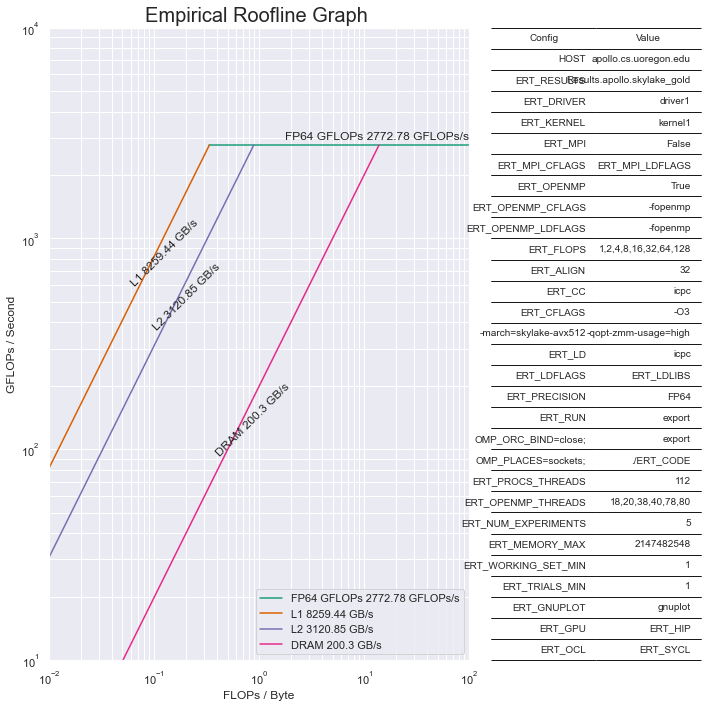

<Figure size 3456x3456 with 0 Axes>

In [38]:
# calculate the axes scale
xmin =   0.01
xmax = 100.00
ymin = 10 # default
ymin = 10 ** int(math.floor(math.log10(g_df['slope'][0]*xmin)))
ymax = ymin ** int(math.floor(math.log10(g_df['slope'][0]*10)))

#calculate the midpoints for labels
xmid = math.sqrt(xmin * xmax)
ymid = g_df['slope'][0] * xmid
y0gbytes = ymid
x0gbytes = y0gbytes/g_df['slope'][0]
alpha = 1.065

# set some general plot settings
fig, (ax,ax2) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [2, 1]})
plt.figure(figsize=(48,48))
title = "Empirical Roofline Graph "
sns.set(rc={'figure.figsize':(12,8)})
palette = sns.color_palette( "Dark2", int(len(g_df)/2))

# plot the lines and peak flop label
#ax = fig.add_subplot(121)
sns.lineplot(data=g_df, x="x", y="y", hue="label",palette=palette, ax=ax)
ax.set(xlabel='FLOPs / Byte', ylabel='GFLOPs / Second')
ax.set(xscale="log", yscale="log", xlim=(xmin, xmax), ylim=(ymin,ymax))
font_size=10

# plot the line label(s)
ax.text(xmax, y0gbytes*alpha, g_df['label'][0], size='medium', ha="right")
for index in range(len(gbytes_df.name.unique())):
    mem = gbytes_df['name'][index]
    (xmax, slope) = max([(gbytes_df['x'][i],gbytes_df['slope'][i]) for i in range(len(gbytes_df['x'])) if gbytes_df['name'][i]==mem])
    xmid = math.sqrt(xmin * xmax)
    ymid = slope * xmid
    y0gbytes = ymid
    x0gbytes = y0gbytes/slope
    alpha = 1.25
    angle = math.degrees(math.atan(slope))/2
    ax.text(x0gbytes, y0gbytes*alpha, gbytes_df['label'][index], size='medium', rotation=angle)

# add table of configs
bbox=[0, 0, 1, 1]
ax2.axis('off')
ax2.axis('tight')
mpl_table = ax2.table(cellText = metadata_df.values, bbox=bbox, colLabels=metadata_df.columns, edges='horizontal')
mpl_table.auto_set_font_size(False)
mpl_table.set_fontsize(font_size)

# add grid lines, title, legend
ax.grid(b=True, which='both')
ax.set_title(title, fontsize=20)
ax.legend(loc='lower right')
#sns.set(font_scale=2.5)

fig.tight_layout();

# save if desired
ax.figure.savefig("roofline.svg");

plt.show();

## Add application performance points
 - these can be loaded from a csv (below)

In [39]:
# GOOGLE COLAB
# Load the csv file
#from google.colab import files
#uploaded = files.upload()
# Load 
#csv_filename = "app_data.csv"
#app_df = pd.read_csv(csv_filename)

# JUPYTER NOTEBOOK
csv_filename = "app_data.csv"
#csv_filename = "n_body_a64.csv"
with open(csv_filename) as csv_file:
    app_df = pd.read_csv(csv_file)
# data

app_df['Gflops/Sec'] = (app_df['Total Flops']/app_df['Time (s)'])/1000000000
app_df

,Arithmetic Intensity,Total Flops,Time (s),Cycles,Label,Gflops/Sec
0,1.062802,4.600000e+10,1.290982,4389488980,p2z niter 5 g++ 9,35.631790
1,1.062802,9.200000e+10,2.707726,8472444802,p2z niter 10 g++ 9,33.976850
2,1.425086,6.140000e+10,0.412815,1183696731,p2z niter 5 intel 19,148.734905
3,1.396698,1.230000e+11,0.826246,2493241479,p2z niter 10 intel 19,148.866076
4,1.060390,4.580000e+10,3.053156,10357917667,p2z niter 5 intel 19 scalar,15.000871


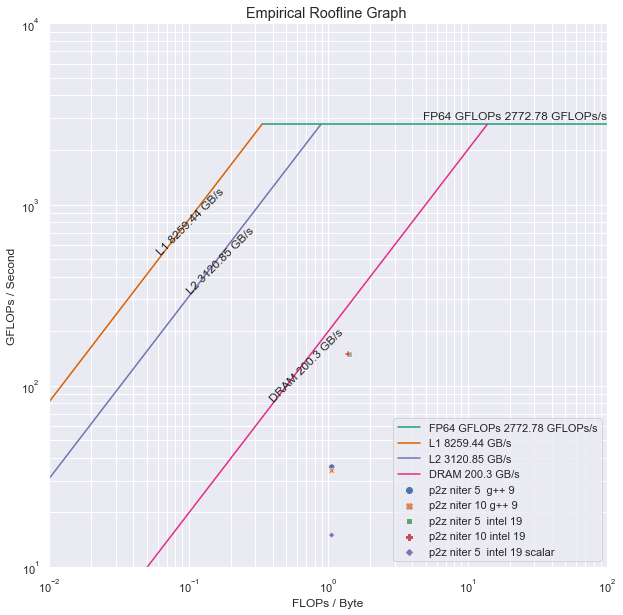

In [40]:
# calculate the axes scale
xmin =   0.01
xmax = 100.00
ymin = 10 # default - change this?
ymin = 10 ** int(math.floor(math.log10(g_df['slope'][0]*xmin)))
ymax = ymin ** int(math.floor(math.log10(g_df['slope'][0]*10)))

#calculate the midpoints for labels
xmid = math.sqrt(xmin * xmax)
ymid = g_df['slope'][0] * xmid
y0gbytes = ymid
x0gbytes = y0gbytes/g_df['slope'][0]
alpha = 1.065

# general plot settings
title = "Empirical Roofline Graph "
sns.set(rc={'figure.figsize':(10,10)})
palette = sns.color_palette( "Dark2", int(len(g_df)/2))

# plot the lines
ax = sns.lineplot(data=g_df, x="x", y="y", hue="label",palette=palette)
ax.set(xlabel='FLOPs / Byte', ylabel='GFLOPs / Second')
ax.set(xscale="log", yscale="log", xlim=(xmin, xmax), ylim=(ymin,ymax))

# plot the line label(s)
for i in range(len(gflops_df.name.unique())):
    ax.text(xmax, y0gbytes*alpha, g_df['label'][i], size='medium', ha="right")
for index in range(len(gbytes_df.name.unique())):
    mem = gbytes_df['name'][index]
    (xmax, slope) = max([(gbytes_df['x'][i],gbytes_df['slope'][i]) for i in range(len(gbytes_df['x'])) if gbytes_df['name'][i]==mem])
    xmid = math.sqrt(xmin * xmax)
    ymid = slope * xmid
    y0gbytes = ymid
    x0gbytes = y0gbytes/slope
    alpha = 1.1
    #angle = math.degrees(math.atan(slope))/2
    ax.text(x0gbytes, y0gbytes*alpha, gbytes_df['label'][index], size='medium', rotation=45)

# plot the application information
ax = sns.scatterplot(x=app_df['Arithmetic Intensity'], y=app_df['Gflops/Sec'], style=app_df['Label'], hue=app_df['Label'])

ax.grid(b=True, which='both',)
ax.set_title(title, size='large')
ax.legend(loc="lower right")

# save if desired
ax.figure.savefig("roofline.svg")
plt.show()

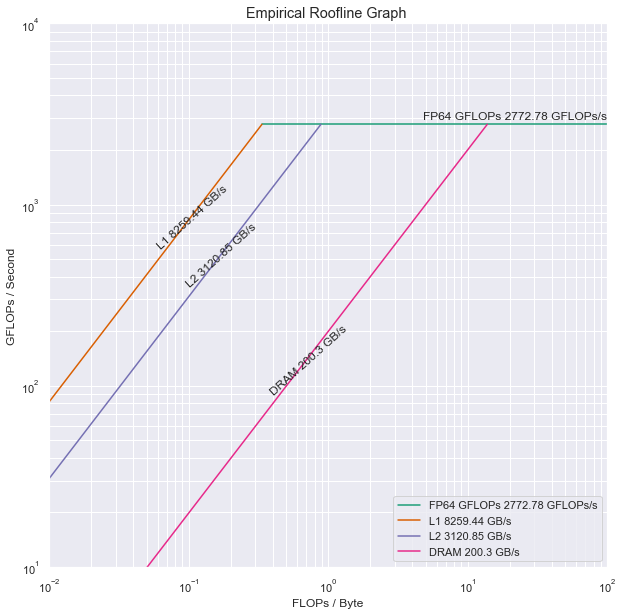

In [43]:
# # calculate the axes scale
# xmin =   0.01
# xmax = 100.00
# ymin = 10 # default - change this?
# ymin = 10 ** int(math.floor(math.log10(g_df['slope'][0]*xmin)))
# ymax = ymin ** int(math.floor(math.log10(g_df['slope'][0]*10)))

# #calculate the midpoints for labels
# xmid = math.sqrt(xmin * xmax)
# ymid = g_df['slope'][0] * xmid
# y0gbytes = ymid
# x0gbytes = y0gbytes/g_df['slope'][0]
# alpha = 1.065

xmin =   0.01
xmax = 100.00
ymin = 10 ** int(math.floor(math.log10(g_df['slope'][0]*xmin)))
ymax = ymin ** int(math.floor(math.log10(g_df['slope'][0]*10)))

#calculate the midpoints for labels
xmid = math.sqrt(xmin * xmax)
ymid = g_df['slope'][0] * xmid
y0gbytes = ymid
x0gbytes = y0gbytes/g_df['slope'][0]
alpha = 1.065


# general plot settings
title = "Empirical Roofline Graph "
#sns.set(rc={'figure.figsize':(12,8)})
palette = sns.color_palette( "Dark2", int(len(g_df)/2))

# plot the lines
ax = sns.lineplot(data=g_df, x="x", y="y", hue="label",palette=palette)
ax.set(xlabel='FLOPs / Byte', ylabel='GFLOPs / Second')
ax.set(xscale="log", yscale="log", xlim=(xmin, xmax), ylim=(ymin,ymax))
#ax = sns.lineplot(x=[0.85849, 0.85849], y=[0.0,1406.31], palette="Dark2_r")
#print(len(ax.lines))
#ax.lines[4].set_linestyle("--")

# plot the line label(s)
for i in range(len(gflops_df.name.unique())):
    ax.text(xmax, y0gbytes*alpha, g_df['label'][i], size='medium', ha="right")
for index in range(len(gbytes_df.name.unique())):
    mem = gbytes_df['name'][index]
    (xmax, slope) = max([(gbytes_df['x'][i],gbytes_df['slope'][i]) for i in range(len(gbytes_df['x'])) if gbytes_df['name'][i]==mem])
    xmid = math.sqrt(xmin * xmax)
    ymid = slope * xmid
    y0gbytes = ymid
    x0gbytes = y0gbytes/slope
    alpha = 1.2
    #angle = math.degrees(math.atan(slope))/2
    ax.text(x0gbytes, y0gbytes*alpha, gbytes_df['label'][index], size='medium', rotation=42)

ax.grid(b=True, which='both',)
ax.set_title(title, size='large')
ax.legend(loc="lower right")

#ymaxx = 1-(1406.31/10000)
#plt.axvline(x=0.85849, ymax=.72,  color="k", linestyle='--', )
#ax.text(0.85849*0.8, y0gbytes, "Machine Balance", size='medium', rotation=90)

# save if desired
ax.figure.savefig("roofline.svg")
plt.show()

### Plotly Version (Work in Progress)

In [42]:
# plot! plotly version
fig = go.Figure()
elements = g_df['name'].unique()
fig.update_xaxes(type="log", range=[-1,2]) 
fig.update_yaxes(type="log", range=[1,4])
# Create traces
for cur_name in elements:
  index = (g_df[g_df['name']==cur_name].index.values)[0]
  x_vals = [g_df['x'][i] for i in range(g_df.shape[0]) if g_df['name'][i] == cur_name]
  y_vals = [g_df['y'][i] for i in range(g_df.shape[0]) if g_df['name'][i] == cur_name]
  fig.add_trace(go.Scatter(x=x_vals, y=y_vals,
                      mode="lines",
                      name=g_df['label'][index]
                      ))
  slope = g_df['slope'][index]
  # get the mid-ish point to add the label
  #calculate the midpoints for labels
  xmid = math.sqrt(xmin * xmax)
  ymid = slope * xmid
  y0gbytes = ymid
  x0gbytes = y0gbytes/slope
  fig.add_annotation(text=cur_name+str(slope),
                  xref="paper", yref="paper",
                  x=x0gbytes, y=y0gbytes, showarrow=False,
                  textangle=-45)
fig.update_layout(
    autosize=False,
    width=1200,
    height=800,
    title="Empirical Roofline Graph",
    xaxis_title="FLOPs / Byte",
    yaxis_title="GFLOPs / Second"
)


fig.show()